In [13]:
#reading relevant packages
import pandas as pd
import folium
import geopandas as gpd
import os
import fiona
from shapely.geometry import shape
from shapely.geometry import Point
import matplotlib.pyplot as plt
import requests
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from scipy.stats import gaussian_kde
import requests
import tempfile
import json

### Reading basemap

In [ ]:
# reading shapefile from url 
url = "https://github.com/yantoniassi1/yantoniassi1.github.io/raw/main/ProjectData/SIRGAS_SHP_distrito.zip"

# Fetch the zip file
response = requests.get(url)
if response.status_code == 200:
    with tempfile.NamedTemporaryFile(suffix=".zip") as tmp_zip:
        tmp_zip.write(response.content)
        tmp_zip.seek(0)  # Go back to the beginning of the file
        
        # Read the shapefile from the temporary zip file
        gdf_districts = gpd.read_file(f"zip://{tmp_zip.name}")
        
        # Display the first rows of the GeoDataFrame
        print(gdf.head())
else:
    print("Failed to download the zip file. HTTP status code:", response.status_code)


In [19]:
#set crs
gdf_districts.crs = "EPSG:31983"
gdf_districts = gdf_districts.to_crs("EPSG:4326")

print(gdf_districts.crs)

EPSG:4326


In [21]:
geojson_path = "SIRGAS_SHP_distritcs.json"
gdf_districts.to_file(geojson_path, driver="GeoJSON")
print(f"GeoJSON saved as {geojson_path}")

GeoJSON saved as SIRGAS_SHP_distritcs.json


### Reading Hospitals points

In [25]:
# reading shapefile from url 
url = "https://github.com/yantoniassi1/yantoniassi1.github.io/raw/main/ProjectData/loc_geosampa_cleaned.zip"

# Fetch the zip file
response = requests.get(url)
if response.status_code == 200:
    with tempfile.NamedTemporaryFile(suffix=".zip") as tmp_zip:
        tmp_zip.write(response.content)
        tmp_zip.seek(0)  # Go back to the beginning of the file
        
        # Read the shapefile from the temporary zip file
        gdf_hosps = gpd.read_file(f"zip://{tmp_zip.name}")
        
        # Display the first rows of the GeoDataFrame
        print(gdf.head())
else:
    print("Failed to download the zip file. HTTP status code:", response.status_code)

       ds_nome ds_codigo ds_cd_sub        ds_subpref ds_sigla    ds_areamt  \
0     MANDAQUI        51        05  SANTANA-TUCURUVI      MAN  13249456.11   
1        MOEMA        32        12      VILA MARIANA      MOE   9079516.47   
2  ARTUR ALVIM         5        21             PENHA      AAL   6505750.23   
3     IGUATEMI        33        30        SAO MATEUS      IGU  19434636.54   
4   ITAIM BIBI        35        11         PINHEIROS      IBI  10026327.68   

   ds_areakm                                           geometry  
0     13.249  POLYGON ((333079.583 7408102.398, 333077.161 7...  
1      9.080  POLYGON ((331290.13 7392111.284, 331324.217 73...  
2      6.506  POLYGON ((349420.638 7397694.618, 349423.468 7...  
3     19.435  POLYGON ((350874.784 7389641.837, 350875.63 73...  
4     10.026  POLYGON ((327871.085 7386152.364, 327865.295 7...  


In [44]:
# Check the CRS of both GeoDataFrames
print("Districts CRS:", gdf_districts.crs)
print("Hospitals CRS:", gdf_hosps.crs)

if gdf_districts.crs != gdf_hosps.crs:
    gdf_hosps = gdf_hosps.to_crs(gdf_districts.crs)

Districts CRS: EPSG:4326
Hospitals CRS: EPSG:4326


In [42]:
#save to geojson
geojson_path = "loc_healthfacilities.json"
gdf_hosps.to_file(geojson_path, driver="GeoJSON")
print(f"GeoJSON saved as {geojson_path}")

GeoJSON saved as loc_healthfacilities.json


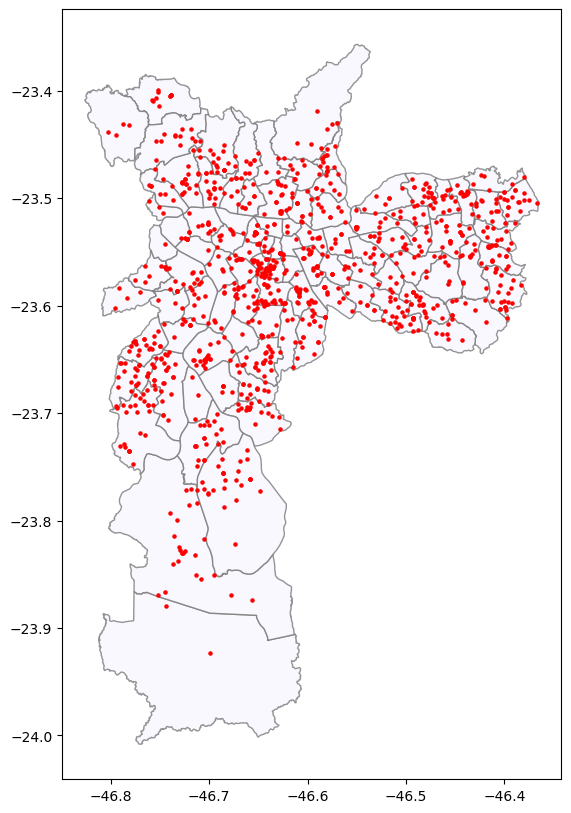

In [43]:
# Plot the basemap
ax = gdf_districts.plot(color='#F8F7FF', edgecolor='#7C7A7A', alpha=0.8, figsize=(10, 10))

# Overlay the points
gdf_hosps.plot(ax=ax, color='red', markersize=5)

# Show the plot
plt.show()

In [46]:
#value counts DEPADM	in gdf_hosps
gdf_hosps["DEPADM"].value_counts()

DEPADM
Municipal    882
Privado      165
Estadual      41
Federal        2
Name: count, dtype: int64